In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
f = open("./final_data.p", "rb")
data = pickle.load(f)

In [3]:
data.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,Family Income 35-40K,Family Income 40-45K,Family Income 45-50K,Family Income 50-60K,Family Income 60-75K,Family Income 75-100K,Family Income 100-125K,Family Income 125-150K,Family Income 150-200K,Family Income > 200K
0,26041,Delta County,19064.0,9974.0,8763.0,327.0,18043.0,8330.0,9533.0,180.0,...,453.0,572.0,528.0,1217.0,1261.0,1697.0,623.0,401.0,234.0,96.0
1,48295,Lipscomb County,1256.0,155.0,1093.0,8.0,1168.0,119.0,1044.0,5.0,...,20.0,29.0,33.0,79.0,123.0,116.0,91.0,54.0,56.0,46.0
2,1127,Walker County,28652.0,7420.0,20722.0,510.0,28497.0,6551.0,21633.0,313.0,...,1041.0,919.0,987.0,1570.0,2209.0,1819.0,1210.0,745.0,437.0,339.0
3,48389,Reeves County,3077.0,1606.0,1445.0,26.0,2867.0,1649.0,1185.0,33.0,...,96.0,119.0,75.0,213.0,320.0,350.0,188.0,69.0,64.0,79.0
4,56017,Hot Springs County,2546.0,619.0,1834.0,93.0,2495.0,523.0,1894.0,78.0,...,50.0,69.0,84.0,122.0,234.0,112.0,148.0,89.0,36.0,58.0


In [4]:
X = data.ix[:, 14:]

In [5]:
X.head()

,# of Housing Units,# White,# White Male,# White Female,# Black,# Black Male,# Black Female,# White Not Hispanic,# White Not Hispanis Male,# White Not Hispanis Female,...,Family Income 35-40K,Family Income 40-45K,Family Income 45-50K,Family Income 50-60K,Family Income 60-75K,Family Income 75-100K,Family Income 100-125K,Family Income 125-150K,Family Income 150-200K,Family Income > 200K
0,3040.0,34754.0,17231.0,17523.0,121.0,60.0,61.0,34581.0,17137.0,17444.0,...,453.0,572.0,528.0,1217.0,1261.0,1697.0,623.0,401.0,234.0,96.0
1,478.0,2980.0,1577.0,1403.0,17.0,8.0,9.0,2361.0,1194.0,1167.0,...,20.0,29.0,33.0,79.0,123.0,116.0,91.0,54.0,56.0,46.0
2,2700.0,60224.0,29335.0,30889.0,3764.0,1781.0,1983.0,59498.0,28884.0,30614.0,...,1041.0,919.0,987.0,1570.0,2209.0,1819.0,1210.0,745.0,437.0,339.0
3,556.0,11899.0,6966.0,4933.0,750.0,578.0,172.0,2677.0,1795.0,882.0,...,96.0,119.0,75.0,213.0,320.0,350.0,188.0,69.0,64.0,79.0
4,326.0,4661.0,2298.0,2363.0,12.0,1.0,11.0,4535.0,2247.0,2288.0,...,50.0,69.0,84.0,122.0,234.0,112.0,148.0,89.0,36.0,58.0


In [6]:
del X["Population"]

In [7]:
X = X.apply(lambda x: x / data["Population"] * 100)

In [8]:
X.head()

,# of Housing Units,# White,# White Male,# White Female,# Black,# Black Male,# Black Female,# White Not Hispanic,# White Not Hispanis Male,# White Not Hispanis Female,...,Family Income 35-40K,Family Income 40-45K,Family Income 45-50K,Family Income 50-60K,Family Income 60-75K,Family Income 75-100K,Family Income 100-125K,Family Income 125-150K,Family Income 150-200K,Family Income > 200K
0,8.251676,94.335116,46.771260,47.563855,0.328438,0.162862,0.165576,93.865530,46.516110,47.349420,...,1.229608,1.552618,1.433186,3.303385,3.422817,4.606281,1.691051,1.088461,0.635162,0.260579
1,13.984786,87.185489,46.138092,41.047396,0.497367,0.234055,0.263312,69.075483,34.932709,34.142774,...,0.585138,0.848449,0.965477,2.311293,3.598596,3.393798,2.662376,1.579871,1.638385,1.345816
2,4.077872,90.957696,44.305327,46.652369,5.684856,2.689885,2.994971,89.861201,43.624171,46.237030,...,1.572246,1.387987,1.490689,2.371207,3.336304,2.747278,1.827491,1.125191,0.660011,0.512000
3,3.977679,85.126628,49.835456,35.291172,5.365574,4.135069,1.230505,19.151524,12.841608,6.309916,...,0.686794,0.851338,0.536557,1.523823,2.289312,2.503935,1.344971,0.493633,0.457862,0.565174
4,6.755077,96.581019,47.617074,48.963945,0.248653,0.020721,0.227932,93.970162,46.560298,47.409863,...,1.036055,1.429755,1.740572,2.527973,4.848736,2.320763,3.066722,1.844177,0.745959,1.201823


In [9]:
X.shape

(2628, 119)

In [10]:
voter_turn_out = (data["total_2016"] - data["total_2012"])/data["Population"] * 100

In [50]:
description = voter_turn_out.describe()
description

count    2628.000000
mean        1.045871
std         3.064287
min       -16.037837
25%        -0.522142
50%         1.143138
75%         2.655468
max        33.625456
dtype: float64

In [54]:
voter_turn_out.sort(inplace=False, ascending=False).head().index

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


Int64Index([1154, 834, 1661, 27, 557], dtype='int64')

In [62]:
for i in list(zip(data.iloc[voter_turn_out.sort(inplace=False, ascending=False).head().index]["county"], voter_turn_out.sort(inplace=False, ascending=False).head())):
    print("{} {:.2f}".format(i[0], i[1]))

Polk County 33.63
Jerome County 17.65
Jasper County 16.22
Sumter County 15.60
McKenzie County 14.05


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [64]:
for i in list(zip(data.iloc[voter_turn_out.sort(inplace=False, ascending=True).head().index]["county"], voter_turn_out.sort(inplace=False, ascending=True).head())):
    print("{} {:.2f}".format(i[0], i[1]))

Otero County -16.04
Terry County -15.33
Newton County -15.21
Iron County -14.92
Whitman County -14.24


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


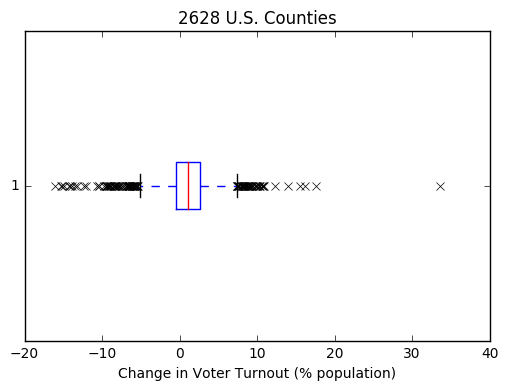

In [12]:
plt.boxplot(voter_turn_out, 0, 'x', 0)
plt.xlabel("Change in Voter Turnout (% population)")
plt.title("2628 U.S. Counties")
plt.show()

In [13]:
iqr = description["75%"] - description["25%"]
low_end =  description["25%"]
high_end = description["75%"]

In [14]:
X_extreme = X[(voter_turn_out < low_end) | (voter_turn_out > high_end)]

In [15]:
turn_out_results = voter_turn_out.apply(lambda x: "High" if x > high_end else "Low")[(voter_turn_out < low_end) | (voter_turn_out > high_end)]

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc.fit(X_extreme, turn_out_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
X_extreme.shape

(1314, 119)

In [20]:
X_extreme.loc[1312]

# of Housing Units              3.372412
# White                        62.370188
# White Male                   30.479090
# White Female                 31.891098
# Black                        30.086145
# Black Male                   14.592914
# Black Female                 15.493231
# White Not Hispanic           58.198933
# White Not Hispanis Male      28.356759
# White Not Hispanis Female    29.842175
# Hispanic                      6.138135
# Hispanic Male                 3.450137
# Hispanic Female               2.687998
# Male                         48.953948
# Female                       51.046052
Median Age                      0.085930
Median Age Male                 0.082259
Median Age Female               0.087873
Citizen: born in US            95.116264
Citizen by Naturalization       0.917590
Foreign born naturalized        0.917590
Never Married                  25.655807
Currently Married              35.453505
Divorced                        9.031241
Separated       

In [21]:
from sklearn.model_selection import KFold

rfc_test = RandomForestClassifier()
total = 0
splits = 10

kf = KFold(n_splits=splits)
for train, test in kf.split(X_extreme):
    X_train = X_extreme.iloc[train]
    X_test = X_extreme.iloc[test]
    y_train = turn_out_results.iloc[train]
    y_test = turn_out_results.iloc[test]
    
    rfc_test.fit(X_train, y_train)

    total += (rfc_test.predict(X_test) == y_test).sum()

        
print(total / X_extreme.shape[0])

0.783105022831


In [22]:
cutoff = pd.Series(rfc.feature_importances_).quantile(0.90)

significant_demographics = []

for i in sorted(zip(X_extreme.columns, rfc.feature_importances_), reverse=True, key=lambda x: x[1]):
    if i[1] > cutoff:
        print(i)
        significant_demographics.append(i[0])

('# Black', 0.078230290221315515)
('In State-Some College', 0.040738866398474329)
('# Black Female', 0.032556005063964125)
('Median Age Male', 0.028420535186812895)
('Total Reporing 0 Income', 0.026852160638551344)
('# of Housing Units', 0.024031521442859277)
('Total Born In State education', 0.021620017442801297)
('Walked', 0.021138691759726359)
('Income 25-35K', 0.019775680278268756)
('Work at Home', 0.017059325944142251)
('Median Age Female', 0.016652443822620926)
('At above 150% poverty line', 0.016534326617086443)


In [23]:
low_means = X_extreme[voter_turn_out < low_end].mean()
high_means = X_extreme[voter_turn_out > high_end].mean()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [24]:
print("demographic, low_turn_out, high_turn_out")
for sig in significant_demographics:
    print("{}, {:.2f}, {:.2f}".format(sig, low_means[sig], high_means[sig]))

demographic, low_turn_out, high_turn_out
# Black, 14.74, 5.65
In State-Some College, 13.79, 10.80
# Black Female, 7.51, 2.76
Median Age Male, 0.28, 0.15
Total Reporing 0 Income, 10.68, 10.60
# of Housing Units, 6.50, 4.50
Total Born In State education, 44.11, 36.86
Walked, 1.49, 1.14
Income 25-35K, 9.82, 9.51
Work at Home, 2.02, 1.96
Median Age Female, 0.30, 0.15
At above 150% poverty line, 67.74, 72.93


Positive values mean a higher ratio voted dem in 2016

In [25]:
ratio_voting_2012 = data["dem_2012"] / (data["dem_2012"] + data["gop_2012"])
ratio_voting_2016 = data["dem_2016"] / (data["dem_2016"] + data["gop_2016"])

voting_ratio_change = (ratio_voting_2016 - ratio_voting_2012) * 100

In [26]:
description = voting_ratio_change.describe()
low_end =  description["25%"]
high_end = description["75%"]

In [65]:
data[voting_ratio_change == voting_ratio_change.max()]

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,Family Income 35-40K,Family Income 40-45K,Family Income 45-50K,Family Income 50-60K,Family Income 60-75K,Family Income 75-100K,Family Income 100-125K,Family Income 125-150K,Family Income 150-200K,Family Income > 200K
1814,49035,Salt Lake County,363749.0,176988.0,176692.0,10069.0,341664.0,132686.0,198739.0,10239.0,...,9318.0,9409.0,10137.0,21271.0,31200.0,41557.0,27347.0,16905.0,15157.0,14884.0


In [68]:
for i in list(zip(data.iloc[voting_ratio_change.sort(inplace=False, ascending=False).head().index]["county"], voting_ratio_change.sort(inplace=False, ascending=False).head())):
    print("{} {:.2f}".format(i[0], i[1]))

Salt Lake County 18.06
Cache County 15.51
Davis County 14.39
Arlington County 11.79
Falls Church City 11.41


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


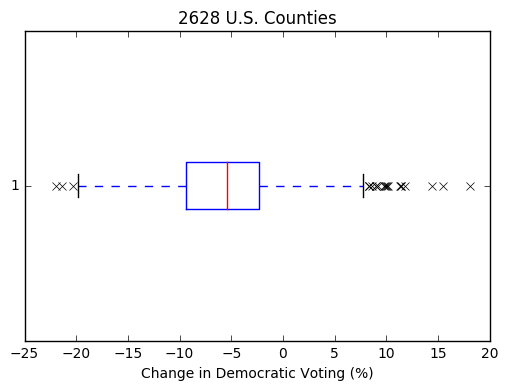

In [67]:
plt.boxplot(voting_ratio_change, 0, 'x', 0)
plt.xlabel("Change in Democratic Voting (%)")
plt.title("2628 U.S. Counties")
plt.show()

In [29]:
bools = (voting_ratio_change < low_end) | (voting_ratio_change > high_end)

X_extreme = X[bools]
ratio_change_results = voting_ratio_change.apply(lambda x: "High" if x > high_end else "Low")[bools]

In [30]:
rfc = RandomForestClassifier()

In [31]:
rfc.fit(X_extreme, ratio_change_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
from sklearn.model_selection import KFold
rfc_test = RandomForestClassifier()
total = 0
splits = 10

kf = KFold(n_splits=splits)
for train, test in kf.split(X_extreme):
    X_train = X_extreme.iloc[train]
    X_test = X_extreme.iloc[test]
    y_train = ratio_change_results.iloc[train]
    y_test = ratio_change_results.iloc[test]
    
    rfc_test.fit(X_train, y_train)

    total += (rfc_test.predict(X_test) == y_test).sum()

        
print(total / X_extreme.shape[0])

0.936834094368


In [33]:
rfc.feature_importances_.mean()

0.0084033613445378148

In [34]:
cutoff = pd.Series(rfc.feature_importances_).quantile(0.90)

significant_demographics = []

for i in sorted(zip(X_extreme.columns, rfc.feature_importances_), reverse=True, key=lambda x: x[1]):
    if i[1] > cutoff:
        print(i)
        significant_demographics.append(i[0])

('# White Not Hispanis Male', 0.11225627719138587)
('Foreign Born below 100% poverty', 0.088470120146734416)
('Foreign Born at/above 1.5X poverty line', 0.079390362826263799)
('# White Not Hispanis Female', 0.05452698181227008)
('Citizen by Naturalization', 0.052634194128806468)
('HS or equal', 0.049030043873150672)
('Total Born In State education', 0.046146354232077323)
('Total Moving White', 0.04097764780709779)
('# Hispanic Female', 0.039264269666375404)
('Graduate', 0.026396418183094218)
('# of Housing Units', 0.026036918809936999)
('# Black Female', 0.020071231513221533)


In [35]:
low_means = X_extreme[voting_ratio_change < low_end].mean()
high_means = X_extreme[voting_ratio_change > high_end].mean()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [36]:
print("demographic, voted more gop, voted more dem")
for sig in significant_demographics:
    print("{}, {:.2f}, {:.2f}".format(sig, low_means[sig], high_means[sig]))

demographic, voted more gop, voted more dem
# White Not Hispanis Male, 45.33, 32.55
Foreign Born below 100% poverty, 0.40, 1.90
Foreign Born at/above 1.5X poverty line, 1.20, 6.23
# White Not Hispanis Female, 45.62, 33.38
Citizen by Naturalization, 0.82, 3.88
HS or equal, 27.76, 17.68
Total Born In State education, 49.82, 32.99
Total Moving White, 92.24, 76.19
# Hispanic Female, 1.52, 7.59
Graduate, 3.57, 7.23
# of Housing Units, 8.36, 3.62
# Black Female, 0.68, 6.50


In [37]:
# see if there is overlap between the groups